This comprehensive analysis delves into the exploration of key factors influencing airline passenger satisfaction. By conducting a robust exploratory data analysis, we aim to uncover and understand the various elements that contribute to the level of satisfaction experienced by passengers during their air travel journeys.

The analysis encompasses a wide range of factors, including departure and arrival time convenience, ease of online booking, check-in service, online boarding, gate location, on-board service, seat comfort, leg room service, cleanliness, food and drink quality, in-flight service, in-flight Wi-Fi service, in-flight entertainment,baggage handling etc.

Ultimately, this analysis aims to provide a comprehensive understanding of the factors that influence passenger satisfaction, empowering airlines to make data-driven decisions and optimize the quality of their services to meet and exceed passengers expectations.

In [41]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas import set_option

In [42]:
data = 'C:/Users/HP/Documents/WORKSPACE/airline_passenger_satisfaction.csv'
df= pd.read_csv(data)

In [5]:
#displaying all the columns and features in the data
pd.set_option('display.max_columns', None)
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [7]:
#dropping the ID column
ds = df.drop('ID', axis=1)


In [8]:
ds.describe()

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
'''
from the above descriptive statistics we can see that the average age of the passengers is 39, whilst maximum age is 85.
The average depature delay time is about 38 minutes whilst the maximux is about 26 hours and 4 minutes.
The average arrival delay time is 15 minutes whilst the maximum is about 26 hours and 53 minutes. 
The average miles traveled 1,190 whilst the maximum was 4,983.
'''

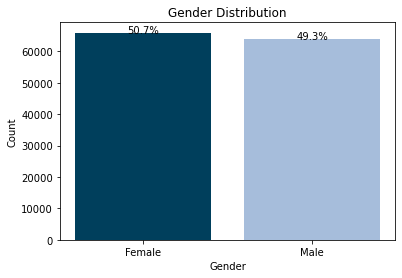

In [9]:
# Count the occurrences of each gender category
gender_counts = ds['Gender'].value_counts()

# Set the color palette for the bar chart
colors = ['#003f5c', '#a6bddb']  # Deep blue and light blue colors

# Create the bar chart
plt.bar(gender_counts.index, gender_counts.values, color=colors)

# Calculate the percentage values
total = gender_counts.sum()
percentages = (gender_counts / total) * 100

# Annotate each bar with its percentage value
for i, count in enumerate(gender_counts.values):
    plt.text(i, count + 0.5, f'{percentages.values[i]:.1f}%', ha='center')

# Set the chart title and labels
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Display the chart
plt.show()








In [ ]:
'''
We can safely say that we have close to equal dsitribution in terms of gender of these passengers.
'''

In [10]:
counts = df['Customer Type'].value_counts()


In [11]:
counts

Returning     106100
First-time     23780
Name: Customer Type, dtype: int64

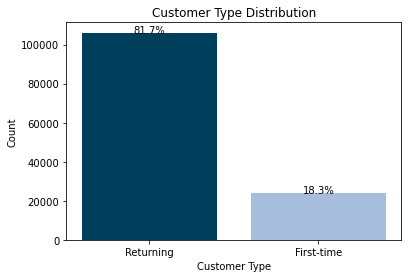

In [12]:
# Count the occurrences of each customer category
customer_counts = ds['Customer Type'].value_counts()

# Set the color palette for the bar chart
colors = ['#003f5c', '#a6bddb']  # Deep blue and light blue colors

# Create the bar chart
plt.bar(customer_counts.index, customer_counts.values, color=colors)

# Calculate the percentage values
total = customer_counts.sum()
percentages = (customer_counts / total) * 100

# Annotate each bar with its percentage value
for i, count in enumerate(customer_counts.values):
    plt.text(i, count + 0.5, f'{percentages.values[i]:.1f}%', ha='center')

# Set the chart title and labels
plt.title('Customer Type Distribution')
plt.xlabel('Customer Type')
plt.ylabel('Count')

# Display the chart
plt.show()


Most of the passengers are returning passengers with approximately 82%
this is why it's highly paramount to understand thier satisfaction levels.


In [13]:
#renaming the Type of travel column to "Travel Type"
ds.columns = ds.columns.str.strip().str.replace('Type of Travel', 'Travle Type')


In [14]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Gender                                  129880 non-null  object 
 1   Age                                     129880 non-null  int64  
 2   Customer Type                           129880 non-null  object 
 3   Travle Type                             129880 non-null  object 
 4   Class                                   129880 non-null  object 
 5   Flight Distance                         129880 non-null  int64  
 6   Departure Delay                         129880 non-null  int64  
 7   Arrival Delay                           129487 non-null  float64
 8   Departure and Arrival Time Convenience  129880 non-null  int64  
 9   Ease of Online Booking                  129880 non-null  int64  
 10  Check-in Service                        1298

In [15]:
travle = ds['Travle Type'].value_counts()

travle

Business    89693
Personal    40187
Name: Travle Type, dtype: int64

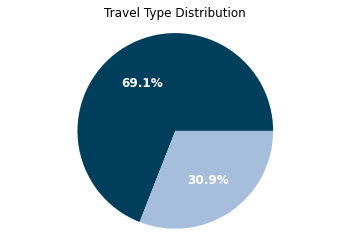

In [16]:
# Count the occurrences of each category
travle_counts = ds['Travle Type'].value_counts()

# Set the colors for the pie chart
colors = ['#003f5c', '#a6bddb']  # Blue and orange colors

# Set the size of the pie chart
#plt.figure(figsize=(8, 8))


# Create the pie chart
plt.pie(travle_counts, labels=travle_counts.index, colors=colors, autopct='%1.1f%%',textprops={'fontsize': 12, 'fontweight': 'bold', 'color': 'white'})

# Set the chart title
plt.title('Travel Type Distribution')

# Equal aspect ratio ensures that the pie is drawn as a circle
plt.axis('equal')

plt.gca().set_facecolor('black')


# Display the chart
plt.show()


we can clearly see that we have a high percentage of the passengers traveling for business related purpose with 
about 69% 

In [17]:
class_travle = ds['Class'].value_counts()
class_travle


Business        62160
Economy         58309
Economy Plus     9411
Name: Class, dtype: int64

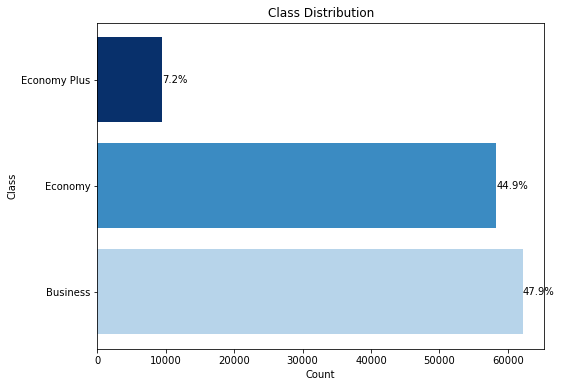

In [18]:
# Count the occurrences of each class
class_counts = ds['Class'].value_counts()

# Calculate the percentage values
total = class_counts.sum()
percentages = (class_counts / total) * 100

# Set the colormap for the bars (light blue to dark blue)
cmap = plt.cm.get_cmap('Blues')
colors = cmap(np.linspace(0.3, 1.0, len(class_counts)))

# Set the size of the bar chart
plt.figure(figsize=(8, 6))

# Create the horizontal bar chart with colored bars
plt.barh(class_counts.index, class_counts.values, color=colors)

# Annotate each bar with its percentage value
for i, count in enumerate(class_counts.values):
    plt.text(count + 1, i, f'{percentages.values[i]:.1f}%', va='center')

# Set the chart title and labels
plt.title('Class Distribution')
plt.xlabel('Count')
plt.ylabel('Class')

# Display the chart
plt.show()

Upon analyzing the class distribution of the passengers, we observe that a significant proportion, approximately 48%, opt for the Business class. This finding provides valuable insights into the passenger demographics and suggests that a considerable number of passengers fall into the high net worth category. The preference for Business class aligns with the assumption that a notable portion of the passengers are likely traveling for business-related purposes. The higher level of comfort, amenities, and services offered in Business class may be attracting professionals, executives, and individuals with a higher financial capacity who prioritize convenience and luxury during their travels. Understanding the distribution of passenger classes sheds light on the diverse travel preferences and socio-economic profiles of the individuals on board.

In [19]:
satisfaction = ds['Satisfaction'].value_counts()
satisfaction


Neutral or Dissatisfied    73452
Satisfied                  56428
Name: Satisfaction, dtype: int64

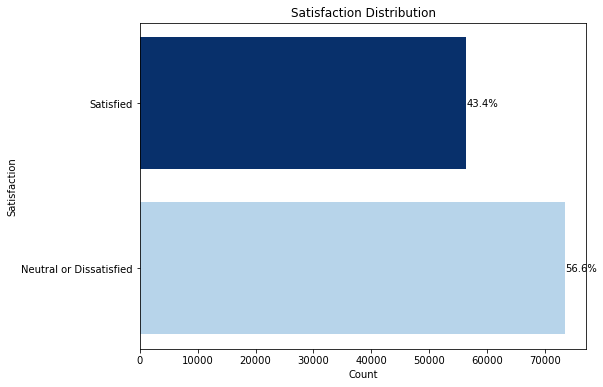

In [20]:
# Count the occurrences of each class
sat_level = ds['Satisfaction'].value_counts()

# Calculate the percentage values
total = sat_level.sum()
percentages = (sat_level / total) * 100

# Set the colormap for the bars (light blue to dark blue)
cmap = plt.cm.get_cmap('Blues')
colors = cmap(np.linspace(0.3, 1.0, len(sat_level)))

# Set the size of the bar chart
plt.figure(figsize=(8, 6))

# Create the horizontal bar chart with colored bars
plt.barh(sat_level.index, sat_level.values, color=colors)

# Annotate each bar with its percentage value
for i, count in enumerate(sat_level.values):
    plt.text(count + 1, i, f'{percentages.values[i]:.1f}%', va='center')

# Set the chart title and labels
plt.title('Satisfaction Distribution')
plt.xlabel('Count')
plt.ylabel('Satisfaction')

# Display the chart
plt.show()

In [21]:
#converting the target column which is satisfied to do some corellation analysis 
ds1= ds['Satisfaction'] = ds['Satisfaction'].replace({'Satisfied': 1, 'Neutral or Dissatisfied': 0})

In [22]:
ds.head()

,Gender,Age,Customer Type,Travle Type,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,Male,48,First-time,Business,Business,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,0
1,Female,35,Returning,Business,Business,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,1
2,Male,41,Returning,Business,Business,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,1
3,Male,50,Returning,Business,Business,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,1
4,Female,49,Returning,Business,Business,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,1


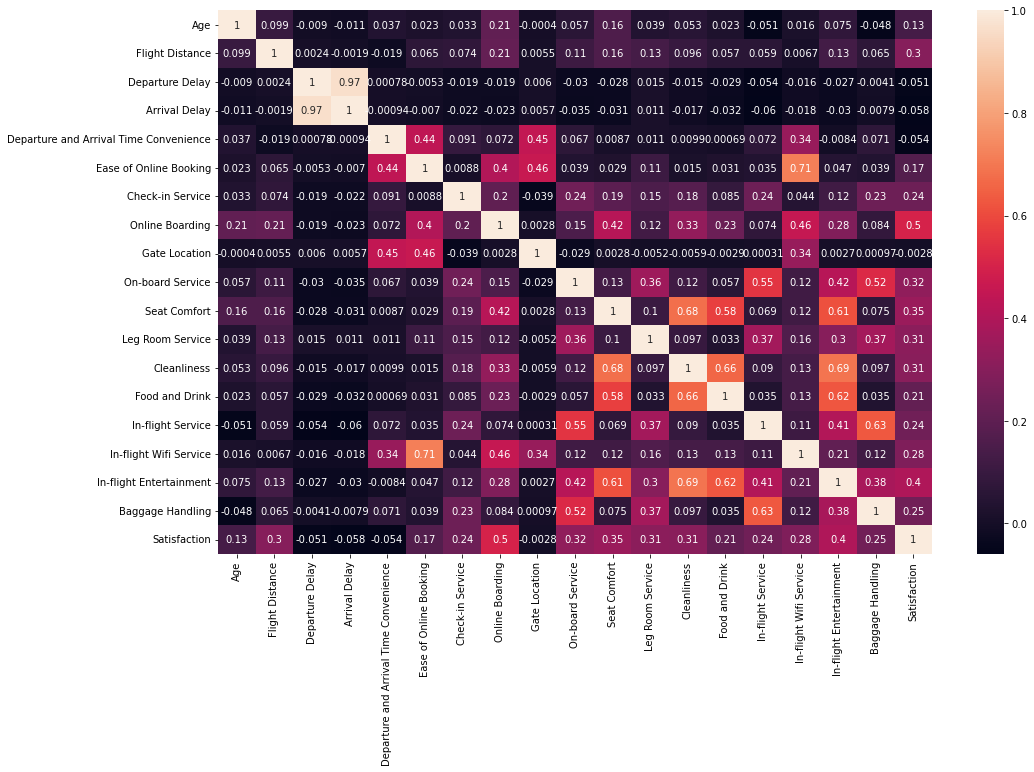

In [23]:
#corrlation analysis
plt.figure(figsize = (16,10))
sns.heatmap(ds.corr(), annot = True) 
set_option ('display.width', 1000)

This heatmap reveals strong correlations among several features in the dataset, indicating significant relationships between them. These correlations provide valuable insights into the underlying patterns and connections within the data. By identifying these relationships, we can gain a deeper understanding of how different variables interact and potentially influence one another. This initial analysis highlights the need for further exploration and investigation into these correlated features. By delving deeper into these relationships, we can uncover hidden dependencies, discover causal connections, and extract meaningful insights that can aid in decision-making and problem-solving. Exploring and understanding these correlations will pave the way for more comprehensive analysis and enable us to make more informed interpretations of the data

<Figure size 1080x720 with 0 Axes>

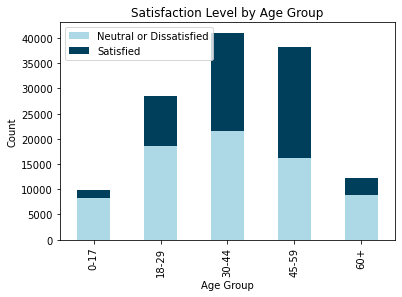

In [24]:
 #Define the age bins
age_bins = [0, 18, 30, 45, 60, 100]  # Define the age ranges for each bin

# Define the labels for the age bins
age_labels = ['0-17', '18-29', '30-44', '45-59', '60+']  # Labels for each age bin

# Create a new column with the age group
ds['Age Group'] = pd.cut(ds['Age'], bins=age_bins, labels=age_labels, right=False)

# Group the data by age group and satisfaction and count the occurrences
age_satisfaction_counts = ds.groupby(['Age Group', 'Satisfaction']).size().unstack()

# Set the colors for the chart
colors = ['#ADD8E6', '#003f5c']  # Light blue, blue colors

# Set the size of the chart
plt.figure(figsize=(15, 10))  # Increased size: 10 inches wide, 6 inches high

# Create the column chart
age_satisfaction_counts.plot(kind='bar', stacked=True, color=colors)

# Set the chart title and labels
plt.title('Satisfaction Level by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Show the legend
plt.legend(['Neutral or Dissatisfied', 'Satisfied'])

# Display the chart
plt.show()

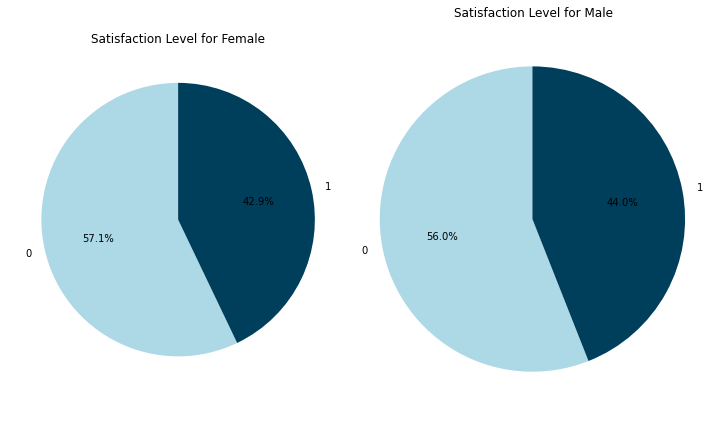

In [41]:
# Group the data by gender and satisfaction and count the occurrences
gender_satisfaction_counts = ds.groupby(['Gender', 'Satisfaction']).size().unstack()

# Calculate the total counts for each gender
gender_totals = gender_satisfaction_counts.sum(axis=1)

# Calculate the percentages of satisfaction within each gender
gender_satisfaction_percentages = gender_satisfaction_counts.divide(gender_totals, axis=0) * 100

# Set the colors for the chart
colors = ['#ADD8E6', '#003f5c']  # Light blue, blue colors

# Set the size of the chart
plt.figure(figsize=(10, 6))

# Create a pie chart for each gender
for i, gender in enumerate(gender_satisfaction_counts.index):
    plt.subplot(1, 2, i+1)
    plt.pie(gender_satisfaction_counts.loc[gender], labels=gender_satisfaction_counts.columns, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.title(f'Satisfaction Level for {gender}')

# Set the aspect ratio to be equal for all pie charts
plt.axis('equal')

# Adjust the spacing between the subplots
plt.tight_layout()

# Display the chart
plt.show()

The male tend to be slightly more satisfied than the female with the services received but we can not say for a fact based on the chart that gender has a crucial role to play in the satisfaction rating of the services

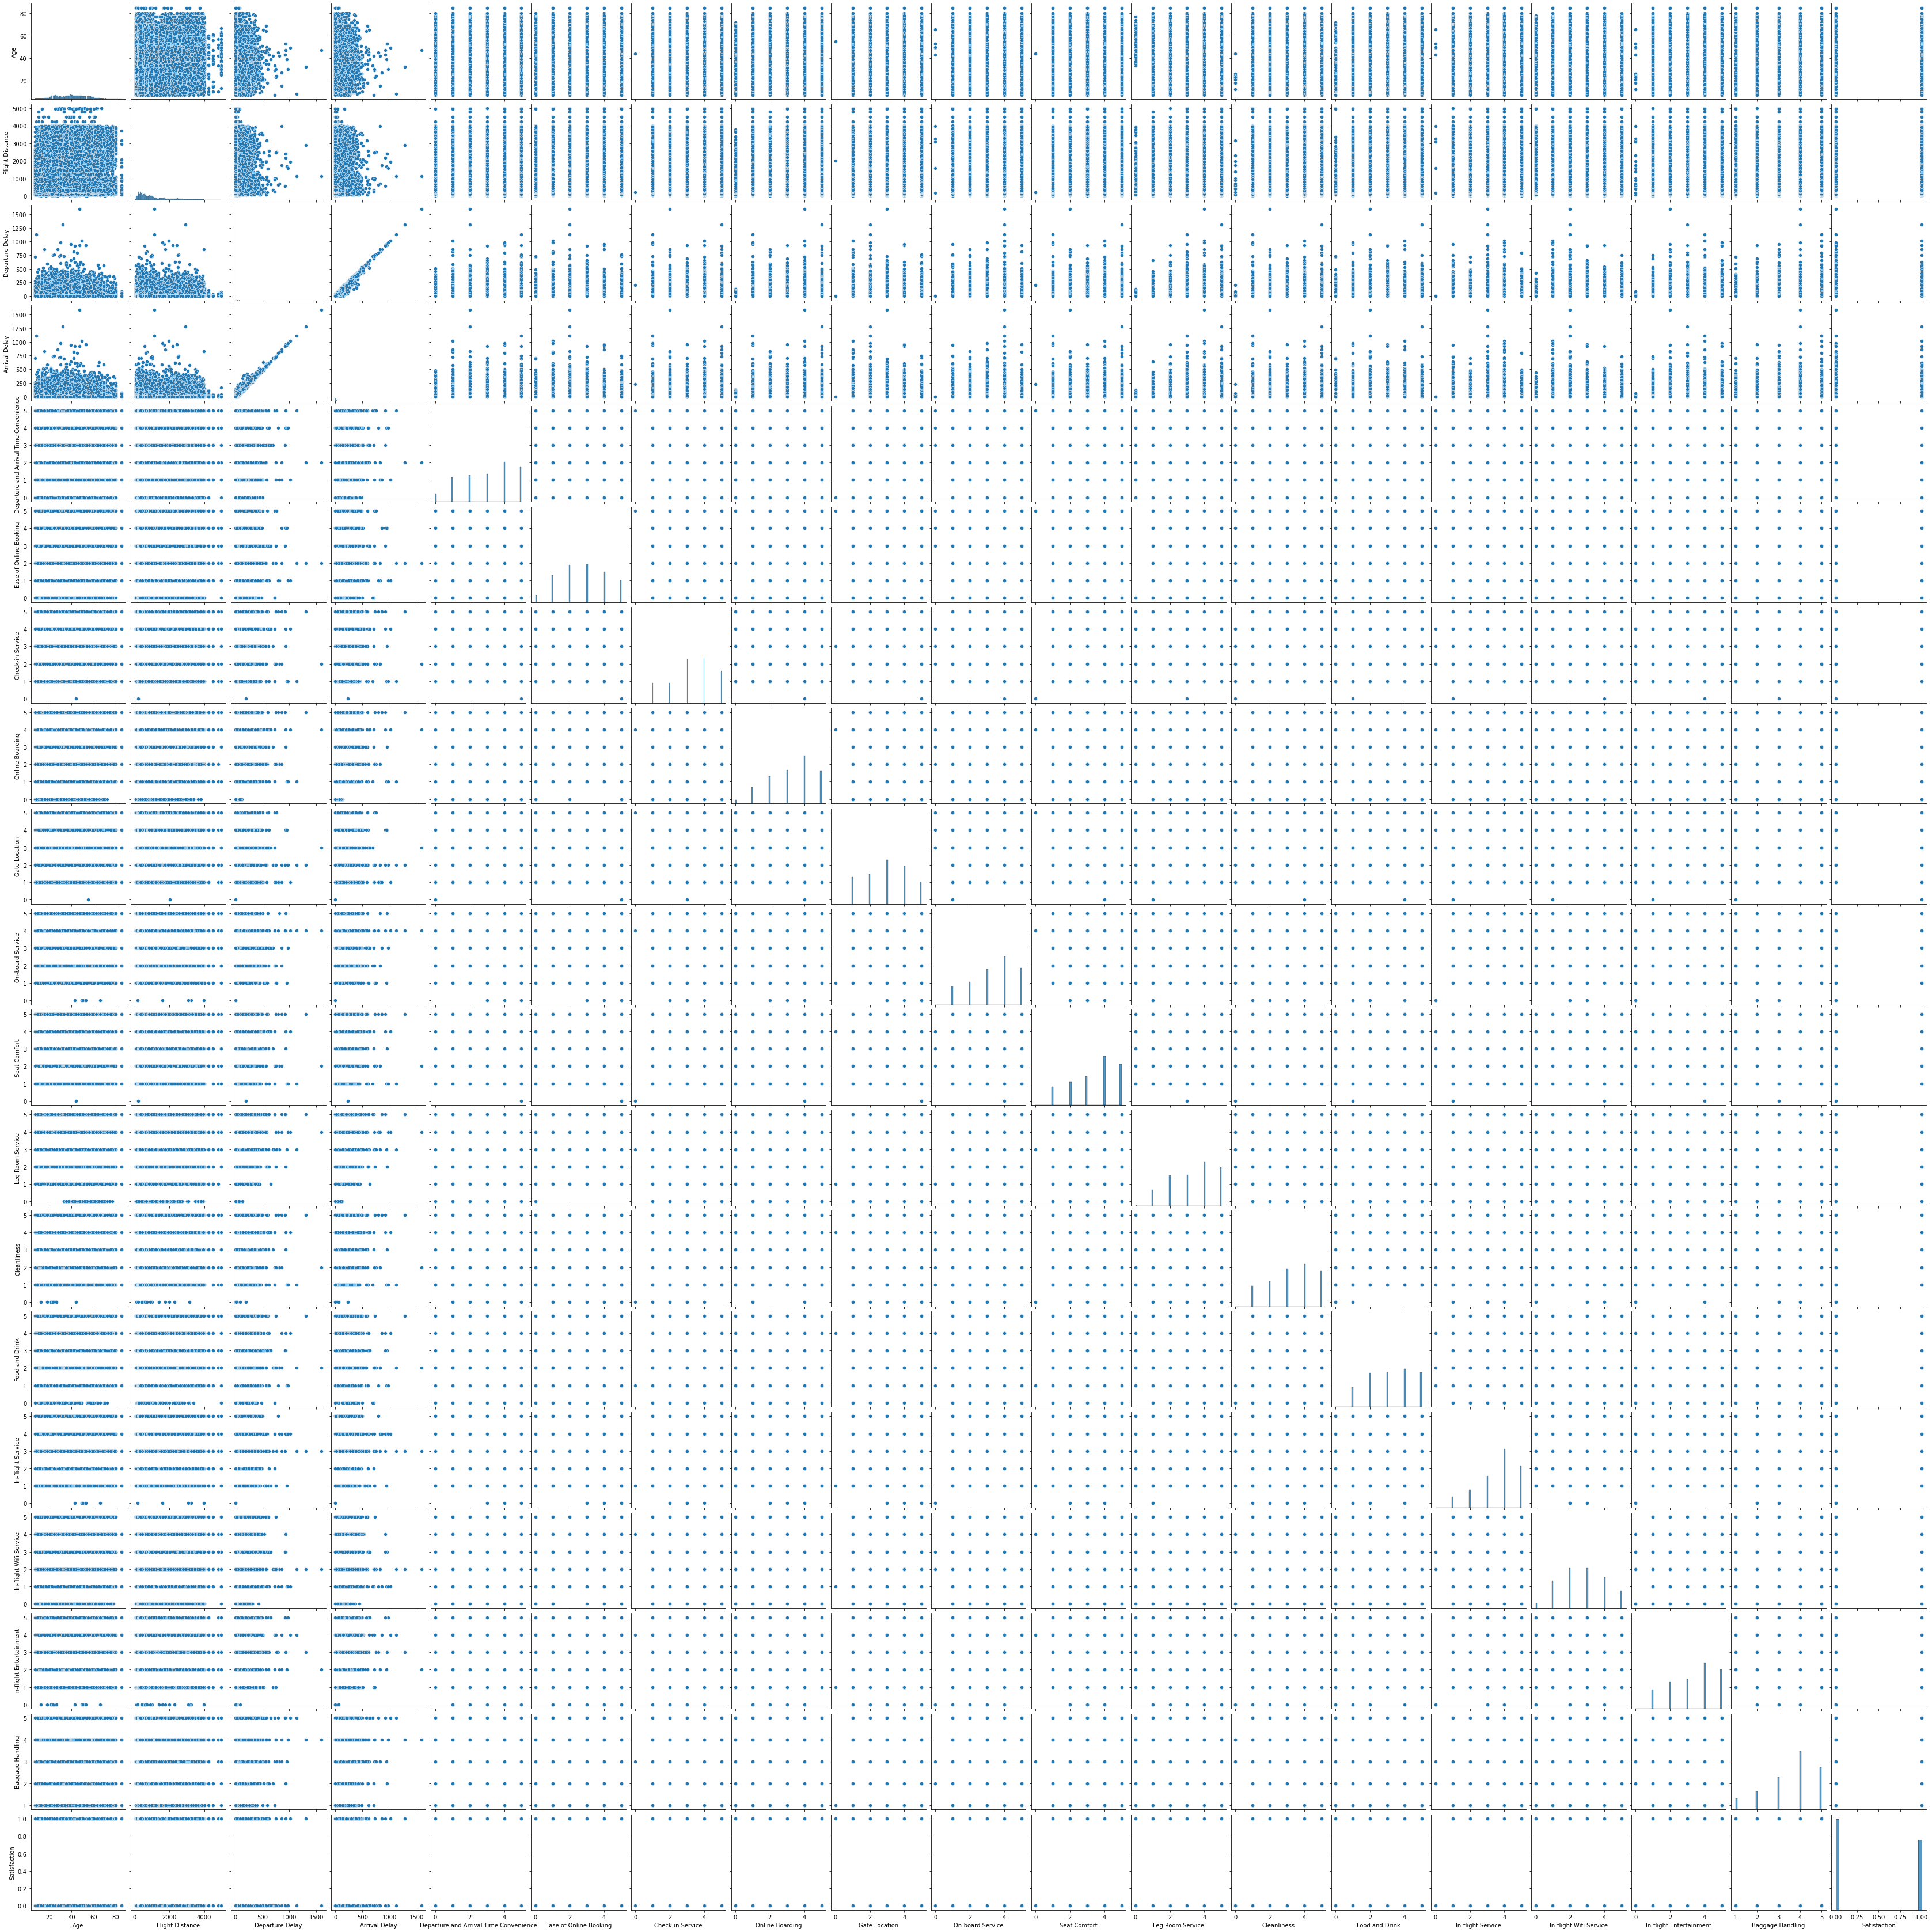

In [36]:
sns.pairplot(data=ds)

# Display the plot
plt.show()

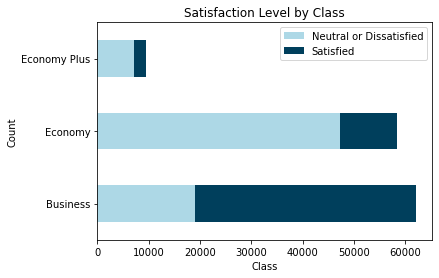

In [26]:
# Create the contingency table
contingency_table = pd.crosstab(ds['Class'], df['Satisfaction'])

# Set the colors for the chart
colors = ['#ADD8E6', '#003f5c']  # Light blue, blue colors

# Plot the bivariate analysis
contingency_table.plot(kind='barh', stacked=True, color=colors)

# Set the chart title and labels
plt.title('Satisfaction Level by Class')
plt.xlabel('Class')
plt.ylabel('Count')

# Show the legend
plt.legend(['Neutral or Dissatisfied', 'Satisfied'])

# Display the chart
plt.show()

The clustered column chart provides valuable insights into the satisfaction levels among different travel classes. The analysis reveals that business class passengers tend to have the highest satisfaction level, while economy class and economy plus passengers exhibit higher levels of dissatisfaction.

This finding indicates that the services and amenities provided in the business class are meeting or even exceeding the expectations of the passengers, resulting in a higher satisfaction level. On the other hand, the dissatisfaction observed among economy class and economy plus passengers suggests that there might be certain areas where improvements can be made to enhance their overall experience.

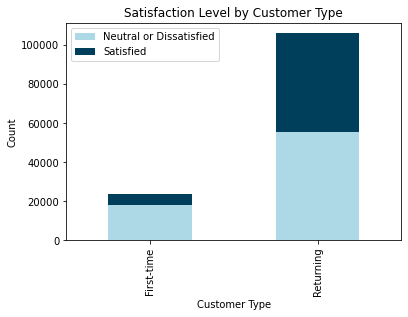

In [27]:
# Create the contingency table
contingency_table = pd.crosstab(ds['Customer Type'], ds['Satisfaction'])

# Set the colors for the chart
colors = ['#ADD8E6', '#003f5c']  # Light blue, blue colors

# Plot the bivariate analysis
contingency_table.plot(kind='bar', stacked=True, color=colors)

# Set the chart title and labels
plt.title('Satisfaction Level by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Count')

# Show the legend
plt.legend(['Neutral or Dissatisfied', 'Satisfied'])

# Display the chart
plt.show()


From the chart, it is evident that there are notable patterns in the satisfaction levels among different types of travelers. Specifically, the analysis reveals that both first-time travelers and returning travelers tend to exhibit lower levels of satisfaction with the services.

This finding implies that there may be certain challenges or discrepancies in meeting the expectations of these two traveler groups. For first-time travelers, their lower satisfaction levels might be attributed to unfamiliarity with the travel experience, lack of prior knowledge or expectations, or potential difficulties in navigating through various aspects of the journey. On the other hand, the presence of dissatisfied returning travelers suggests that there might be recurring issues or persistent factors impacting their satisfaction despite their previous travel experience.

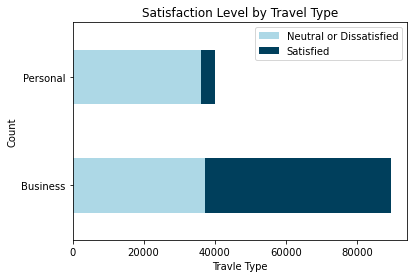

In [28]:
# Create the contingency table
contingency_table = pd.crosstab(ds['Travle Type'], df['Satisfaction'])

# Set the colors for the chart
colors = ['#ADD8E6', '#003f5c']  # Light blue, blue colors

# Plot the bivariate analysis
contingency_table.plot(kind='barh', stacked=True, color=colors)

# Set the chart title and labels
plt.title('Satisfaction Level by Travel Type')
plt.xlabel('Travle Type')
plt.ylabel('Count')

# Show the legend
plt.legend(['Neutral or Dissatisfied', 'Satisfied'])

# Display the chart
plt.show()

Based on the visual, it is evident that there is a clear distinction between personal travelers and business travelers in terms of satisfaction with the services. The data indicates that personal travelers generally tend to be less satisfied compared to business travelers. This finding suggests that there might be specific factors or aspects of the services that are more aligned with the needs and expectations of business travelers, leading to a higher satisfaction level among this group.

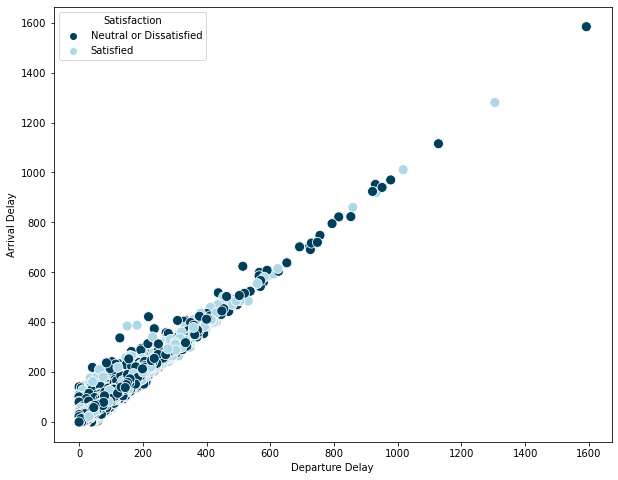

In [46]:
plt.figure(figsize=(10, 8))  # Set the figure size (width, height) in inches

sns.scatterplot(x=df['Departure Delay'], y=df['Arrival Delay'], hue=df['Satisfaction'], s=100, palette=['#003f5c', '#ADD8E6'])

# Display the plot
plt.show()

The scatter plot analysis reveals a strong positive correlation between departure delay and arrival delay, indicating that as the departure delay increases, the corresponding arrival delay also tends to increase. This finding suggests that delays in the departure process have a direct impact on the timeliness of arrivals.

Furthermore, the scatter plot also demonstrates an interesting relationship between the delay variables and passenger satisfaction. It shows that as both departure delay and arrival delay increase, there is a noticeable decrease in the satisfaction level of the passengers. This implies that prolonged delays in the travel process have a negative effect on the overall satisfaction of passengers.

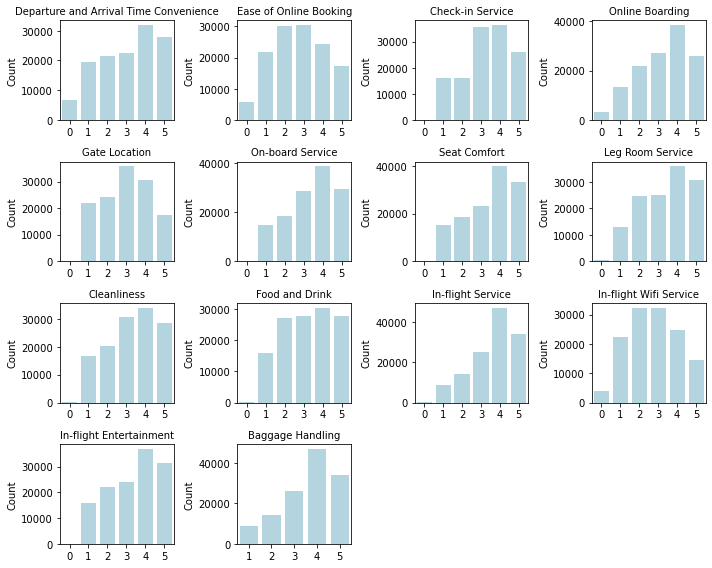

In [49]:
# Set the light blue color
color = '#ADD8E6'

# Set the size of the chart
plt.figure(figsize=(10, 8))

# List of features
features = ['Departure and Arrival Time Convenience', 'Ease of Online Booking', 'Check-in Service', 'Online Boarding',
            'Gate Location', 'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink',
            'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling']

# Iterate over each feature and plot
for i, feature in enumerate(features):
    plt.subplot(4, 4, i+1)
    sns.countplot(x=feature, data=df, color=color)
    plt.xlabel('')
    plt.ylabel('Count')
    plt.title(feature, fontsize=10)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the chart
plt.show()


Through a meticulous analysis of passenger ratings, we gained valuable insights into the level of satisfaction with various services offered by airlines. The ratings shed light on the aspects that left passengers dissatisfied and highlight areas that require attention and improvement.

It is evident from the ratings that services such as in-flight Wi-Fi and ease of online booking received lower satisfaction scores. This indicates that passengers faced challenges or encountered issues while accessing Wi-Fi during their flights and found the online booking process less convenient than expected. Addressing these concerns and enhancing the reliability and accessibility of in-flight Wi-Fi as well as streamlining the online booking system could significantly improve the overall passenger experience.

Furthermore, the ratings also indicate some dissatisfaction with aspects such as food and drink quality, gate location, and cleanliness. These factors play a crucial role in shaping passengers' perceptions and overall satisfaction with their travel experience. Enhancing the quality and variety of food and beverages offered, ensuring convenient gate locations for smoother boarding experiences, and maintaining a high level of cleanliness throughout the aircraft can greatly contribute to creating a more satisfying journey for passengers.

Findings:

Age Group: Passengers aged 30-44 have the highest number of dissatisfied individuals, suggesting a need to address their specific concerns to improve overall satisfaction within this age range.

Gender: The chart does not provide conclusive evidence regarding the role of gender in satisfaction ratings, as both male and female passengers exhibit varying levels of satisfaction without a clear pattern.

Travel Class: Business class passengers tend to have the highest satisfaction levels, while economy class and economy plus passengers show higher levels of dissatisfaction, highlighting the need for improvements in these classes.

Traveler Type: Both first-time travelers and returning travelers tend to exhibit lower satisfaction levels, indicating the existence of challenges and recurring issues that impact their overall satisfaction.

Departure and Arrival Delays: There is a strong positive correlation between departure delay and arrival delay. Prolonged delays have a negative impact on passenger satisfaction, emphasizing the importance of timely and efficient travel operations.

Service Ratings: Passengers expressed dissatisfaction with in-flight Wi-Fi, ease of online booking, food and drink quality, gate location, and cleanliness. Addressing these areas can significantly enhance passenger satisfaction.

Conclusion:

Based on the findings, it is evident that various factors contribute to passenger satisfaction. Airlines should focus on addressing specific areas such as in-flight Wi-Fi availability and reliability, streamlining the online booking process, improving food and beverage quality, optimizing gate locations, and maintaining high standards of cleanliness throughout the aircraft.

Additionally, catering to the unique needs and expectations of different age groups, such as the 30-44 age range, can further enhance overall satisfaction levels. Airlines should strive to improve the travel experience for first-time travelers and address any recurring issues faced by returning travelers.

Efforts should be made to minimize departure and arrival delays, as they have a direct impact on passenger satisfaction. Timeliness and efficiency in operations are essential for ensuring a positive travel experience.

Overall, by addressing the identified areas of improvement and tailoring services to meet passenger expectations, airlines can enhance passenger satisfaction, foster loyalty, and establish a reputation for delivering a rewarding and enjoyable travel experience.